# Gradient Descent

Gradient Descent is the simplest learning algorithm. Suppose you have a set of observations of some process you wanted to model, for example the size of a house labelled as $ x_i \in \mathrm{R}^n $, and the house price labeleld as $ y_i \in \mathrm{R} $, $ i = 1 \ldots m$ (i.e. you have $m$ examples). One good choice for a model is linear:

$$ \hat{y}\left(x\right) = Ax + b $$

The goal is to find some suitable $ A \in \mathcal{R}^n $ and $ b \in \mathcal{R} $, to model this process coreectly. An example is shown below (the data is taken from the Coursera Machine Learning class). 

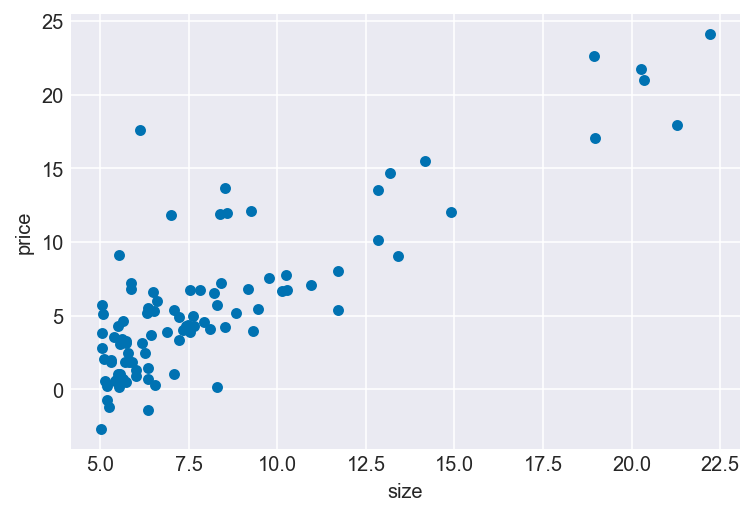

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

We'll generate some data that we'll use for the rest of this post:

In [2]:
def generate_data(n, m=2.25, b=6.0, stddev=1.5):
    """Generate n data points approximating given line.
    m, b: line slope and intercept.
    stddev: standard deviation of added error.
    Returns pair x, y: arrays of length n.
    """
    x = np.linspace(-2.0, 2.0, n)
    y = x * m + b + np.random.normal(loc=0, scale=stddev, size=n)
    return x.reshape(-1, 1), y

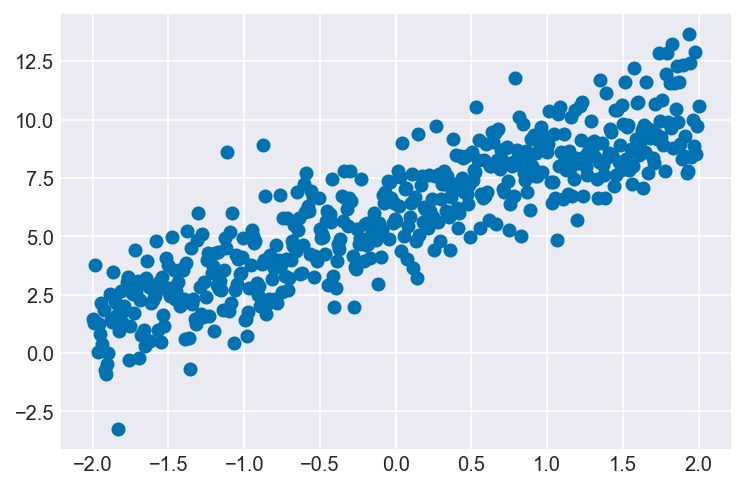

In [3]:
N = 500
X, y = generate_data(N)
plt.scatter(X, y)

For convenience, let's define $\Theta = [A: b]$ be a $ (n+1) \times 1 $ vector, let $ X = [x_1: \ldots : x_m :1] \in \mathrm{R}^{(n+1) \times m} $, and let $Y = [y_1: \ldots : y_m :1]$ (i.e. we expanded both to include the intercept, and we concatenate all the examples into a single matrix of x's and y's respectively). Now out hypothesis can be written as $ \hat{Y} = \Theta^T X $ 

Say you also had good reason to believe that the best reconstruction of $ x $ you could possilby hope to achieve was to minimise the following (mean squared) error measure:

$$ J\left(\Theta\right) = \frac{1}{n} \lVert \hat{Y} - Y\rVert_2^2 $$

A function to compute the cost is below:

In [4]:
def MSE(y, yhat):
    """Function to compute MSE between true values and estimate
    
    y: true values
    yhat: estimate
    """
    assert(y.shape == yhat.shape)
    return np.square(np.subtract(y, yhat)).mean()

We could also seek to minimise the least absolute deviations of our predictions from the data:

$$ J\left(\Theta\right)  = \frac{1}{n} \lVert \hat{Y} - Y\rVert_1 $$

a function to do this is included below:

In [5]:
def MAE(y, yhat):
    """Function to compute LAE between true values and estimate
    
    y: true values
    yhat: estimate
    """
    assert(y.shape == yhat.shape)
    return np.absolute(y - yhat).mean()

There are a couple of ways you could find such an $ \hat{Y} $, given a cost function. The most straigtforward is to start with some initital value, and then move in the direction of the negative gradient of the cost funtion:  

$$ \Theta_{k+1} = \Theta_{k} - \alpha\nabla_{\Theta} J\left(\Theta\right) $$ 

with $ \Theta_0 = 0 $. Here. $\alpha$ is the learning rate - a tuneable parameter.

The following function does exactly this, using autograd to avoid mathematically computing the gradients.



In [6]:
def gradient_descent(X, y, cost, learning_rate=0.01, num_iters=250):
    m, n = X.shape
    theta = np.zeros((n, 1))
    yhat = theta.T @ X.T
    yield theta, cost(y.reshape(-1, 1), yhat.T)
    
    for i in range(num_iters):
        yhat = theta.T @ X.T
        yhatt = yhat.T
        nabla = np.sum(X.T @ (y.reshape(-1, 1) - yhatt), axis=1).reshape(-1, 1)
        assert(nabla.shape == theta.shape)
        theta +=  (2 * learning_rate / m) * nabla
        yield theta, cost(y.reshape(-1, 1), yhat.T)

In [7]:
ones = np.ones_like(X)
X = np.concatenate([X, ones], axis=1)
thetas = gradient_descent(X, y, MSE)

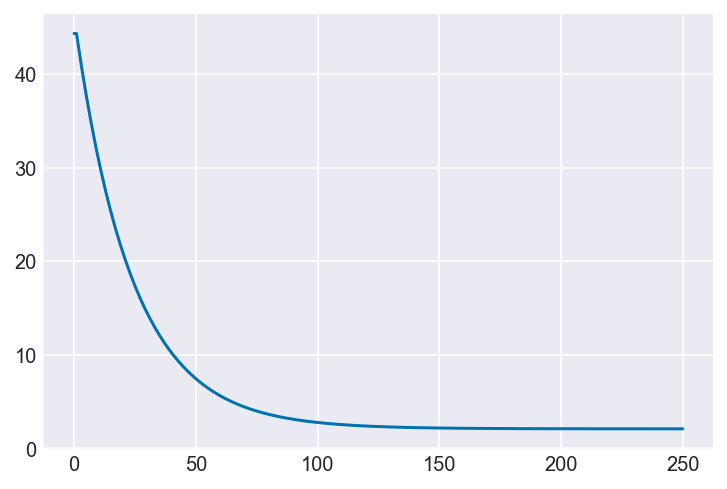

In [8]:
final = [(t, c) for t,c in thetas]
costs = [x[1] for x in final]
theta = final[-1][0]
plt.plot(costs)

In [9]:
theta

array([[ 2.27769915],
       [ 5.90213934]])

In [10]:
x = np.linspace(-2.0, 2.0)
yhat = x * theta[0] + theta[1]

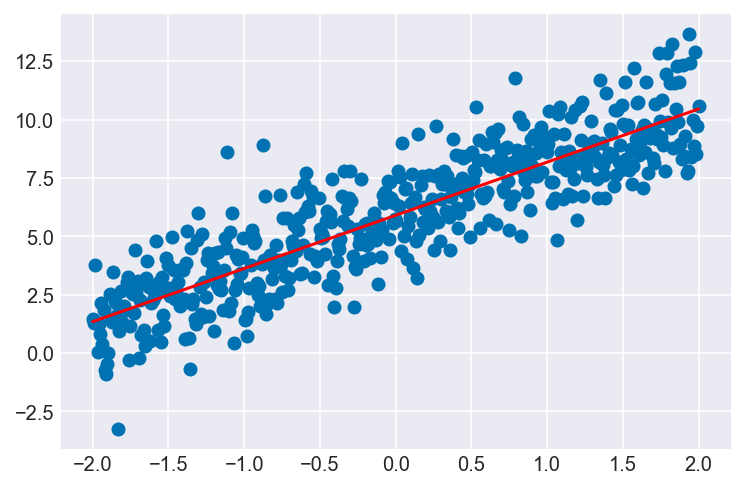

In [11]:
plt.scatter(X[:,0], y)
plt.plot(x, yhat, "r-")

Firstly, if you are minimising the MSE you can compute it analytically via

$$ (A^T A)^{-1} A^Ty $$